In [1]:
import cv2
import numpy as np
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

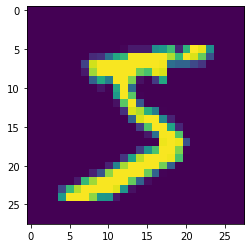

In [3]:
plt.imshow(x_train[0])

In [0]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [0]:
rgb_list = []
dim = (139, 139)
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_train = np.squeeze(rgb_arr, axis=4)

In [0]:
rgb_list = []
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_test = np.squeeze(rgb_arr, axis=4)

In [0]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


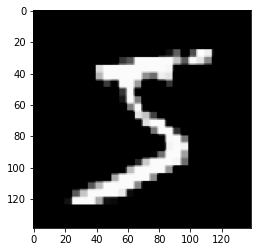

In [8]:
plt.imshow(X_train[0])

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 139, 139, 3) (10000, 139, 139, 3) (60000, 10) (10000, 10)


In [0]:
base = InceptionV3(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 30,236,458
Trainable params: 8,433,674
Non-trainable params: 21,802,784
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 973us/step - loss: 2.2492 - accuracy: 0.5992 - val_loss: 3.4332 - val_accuracy: 0.3191
Epoch 2/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.7371 - accuracy: 0.7711 - val_loss: 2.3727 - val_accuracy: 0.3687
Epoch 3/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.5696 - accuracy: 0.8183 - val_loss: 3.4734 - val_accuracy: 0.2712
Epoch 4/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.4740 - accuracy: 0.8470 - val_loss: 3.7990 - val_accuracy: 0.3263
Epoch 5/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.4090 - accuracy: 0.8686 - val_loss: 2.0146 - val_accuracy: 0.4303
Epoch 6/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.3586 - accuracy: 0.8832 - val_loss: 3.2497 - val_accuracy: 0.3256
Epoch 7/10
60000/60000 [==============================] 

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [17]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.16666666666666666
Precision for class 1 = 0.9917491749174917
Precision for class 2 = 0.1554211261051652
Precision for class 3 = 0.2564102564102564
Precision for class 4 = 0.7833333333333333
Precision for class 5 = 0.3585291113381001
Precision for class 6 = 0.20172478440194977
Precision for class 7 = 0.4853801169590643
Precision for class 8 = 0.8492063492063492
Precision for class 9 = 0.3333333333333333
Mean Precision =  0.4581754252671709


In [18]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.0010204081632653062
Recall for class 1 = 0.5295154185022026
Recall for class 2 = 0.6472868217054264
Recall for class 3 = 0.009900990099009901
Recall for class 4 = 0.4786150712830957
Recall for class 5 = 0.39349775784753366
Recall for class 6 = 0.5615866388308977
Recall for class 7 = 0.08073929961089495
Recall for class 8 = 0.10985626283367557
Recall for class 9 = 0.0009910802775024777
Mean Recall =  0.28130097491535044


In [19]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  23.136375014404177
